## Tarea 1

Revisar la sección de transformaciones matemáticas (https://otexts.com/fpppy/nbs/03-decomposition.html#mathematical-transformations) y posteriormente realizar de la sección 3.7 realizar los ejercicios 1 al 4 referentes a la transformación Box-Cox (https://otexts.com/fpppy/nbs/03-decomposition.html).

## Ejercicio 1.
Consider the GDP information in global_economy. Plot the GDP per capita for each country over time. Which country has the highest GDP per capita? How has this changed over time?

Aquí vamos a mandar a llamar a todas las librerías que vamos a utiilizar.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy.stats import boxcox_normmax


In [112]:
csv_path = "https://raw.githubusercontent.com/AnthonyFl22/series-de-tiempo/refs/heads/main/Tarea%201/global_economy.csv"
df0 = pd.read_csv(csv_path)

In [113]:
df0.head()

,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


In [114]:
df = df0.copy()
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

In [115]:
print("Columnas disponibles:", set(df.columns))

Columnas disponibles: {'ds', 'gdp', 'population', 'growth', 'cpi', 'imports', 'unique_id', 'exports', 'code'}


In [116]:
df = df0.rename(columns={
    "ds": "Year",
    "unique_id": "Country"
})


In [117]:
print("Columnas disponibles:", set(df.columns))

Columnas disponibles: {'Growth', 'Population', 'CPI', 'GDP', 'Imports', 'Code', 'Exports', 'Country', 'Year'}


In [118]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["GDP"] = pd.to_numeric(df["GDP"], errors="coerce")
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")

In [119]:
df = df.dropna(subset=["Country", "Year", "GDP", "Population"])
df = df[df["Population"] > 0]

In [120]:
# Calcular PIB per cápita
df["gdp_per_capita"] = df["GDP"] / df["Population"]

# Ordenar de mayor a menor PIB per cápita
df = df.sort_values(["gdp_per_capita"], ascending=False).reset_index(drop=True)
df.head()


,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,gdp_per_capita
0,Monaco,MCO,2014,7.060236e+09,7.179637,NaN,NaN,NaN,38132.0,185152.527227
1,Monaco,MCO,2008,6.476490e+09,0.731801,NaN,NaN,NaN,35853.0,180640.125115
2,Liechtenstein,LIE,2014,6.657171e+09,NaN,NaN,NaN,NaN,37127.0,179308.075616
3,Liechtenstein,LIE,2013,6.391736e+09,NaN,NaN,NaN,NaN,36834.0,173528.150454
4,Monaco,MCO,2013,6.553372e+09,9.570799,NaN,NaN,NaN,37971.0,172588.877783


In [121]:
# Ordenamos de menor a mayor

df = df.sort_values(["Country", "Year"], ascending=[True, False]).reset_index(drop=True)


In [122]:
df

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,gdp_per_capita
0,Afghanistan,AFG,2017,1.954398e+10,2.665292,145.610741,45.332065,5.904816,35530081.0,550.068459
1,Afghanistan,AFG,2016,1.904636e+10,2.260314,138.708666,41.725695,5.933361,34656032.0,549.582760
2,Afghanistan,AFG,2015,1.990711e+10,1.451315,132.883209,43.437543,11.687984,33736494.0,590.076474
3,Afghanistan,AFG,2014,2.048489e+10,2.724543,133.768367,51.413547,15.782377,32758020.0,625.339539
4,Afghanistan,AFG,2013,2.056107e+10,5.600745,127.795223,55.152327,19.591582,31731688.0,647.966460
...,...,...,...,...,...,...,...,...,...,...
11820,Zimbabwe,ZWE,1964,1.217138e+09,-1.106172,NaN,NaN,NaN,4269863.0,285.053174
11821,Zimbabwe,ZWE,1963,1.159512e+09,6.244345,NaN,NaN,NaN,4132756.0,280.566213
11822,Zimbabwe,ZWE,1962,1.117602e+09,1.434471,NaN,NaN,NaN,3999419.0,279.440989
11823,Zimbabwe,ZWE,1961,1.096647e+09,6.316157,NaN,NaN,NaN,3870756.0,283.315869


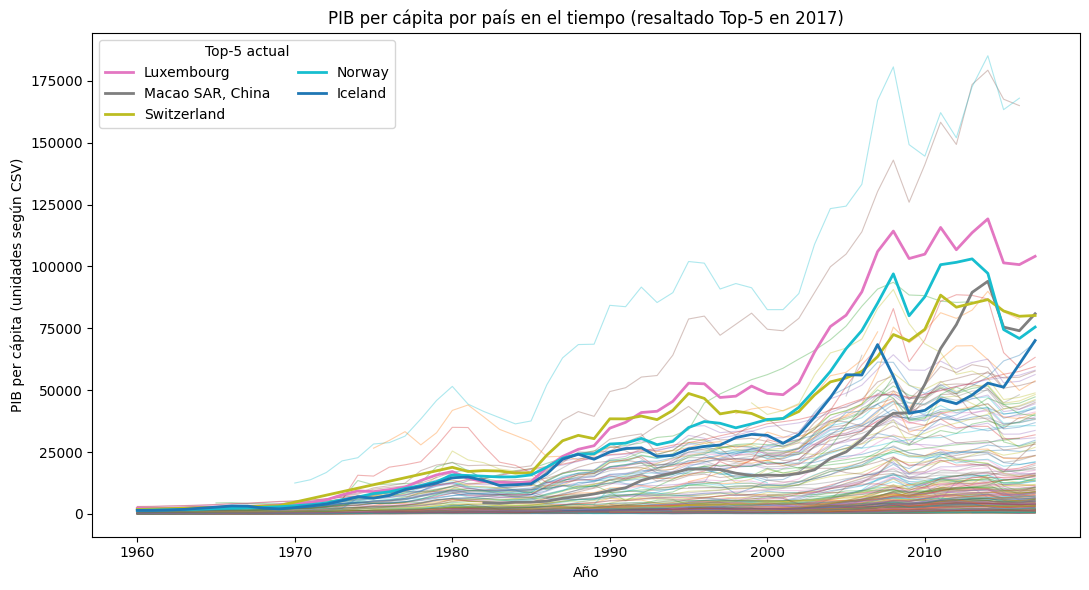

In [123]:
# Si bien sabemos que el último año es 2017, podemos sacarlo para que, en caso de que actualicen los datos, no tengamos que cambiar el código
last_year = int(df["Year"].max())
df_last = df[df["Year"] == last_year].copy()

top5_now = (
    df_last.sort_values("gdp_per_capita", ascending=False)
           .head(5)["Country"]
           .tolist()
)

fig, ax = plt.subplots(figsize=(11, 6))

# Trazamos todos los países en gris claro y líneas finas para tener contexto
for country, g in df.groupby("Country"):
    ax.plot(g["Year"], g["gdp_per_capita"], linewidth=0.8, alpha=0.35)

# Resaltamos los top-5 del año más reciente con líneas más gruesas
for country in top5_now:
    g = df[df["Country"] == country]
    ax.plot(g["Year"], g["gdp_per_capita"], linewidth=2.0, label=country)

ax.set_title(f"PIB per cápita por país en el tiempo (resaltado Top-5 en {last_year})")
ax.set_xlabel("Año")
ax.set_ylabel("PIB per cápita (unidades según CSV)")
ax.legend(title="Top-5 actual", loc="upper left", ncol=2)
plt.tight_layout()
plt.show()


In [124]:
# Mostramos por año: país líder en PIB per cápita :D
leaders_by_year = (
    df.loc[df.groupby("Year")["gdp_per_capita"].idxmax(), ["Year", "Country", "gdp_per_capita"]]
      .sort_values("Year")
      .reset_index(drop=True)
)

display(leaders_by_year.head(10))
display(leaders_by_year.tail(10))

# En toda la historia: el mayor valor observado (país-año)
idx_global_max = df["gdp_per_capita"].idxmax()
global_max_row = df.loc[idx_global_max, ["Year", "Country", "gdp_per_capita"]]
print("Máximo histórico observado:")
display(global_max_row.to_frame().T)

# En el último año disponible:
leader_last_year = leaders_by_year[leaders_by_year["Year"] == last_year]
print(f"Líder en {last_year}:")
display(leader_last_year)


,Year,Country,gdp_per_capita
0,1960,United States,3007.123445
1,1961,United States,3066.562869
2,1962,United States,3243.843078
3,1963,United States,3374.515171
4,1964,United States,3573.941185
5,1965,Kuwait,4429.171107
6,1966,Kuwait,4556.463065
7,1967,United States,4336.426587
8,1968,United States,4695.923390
9,1969,United States,5032.144743


,Year,Country,gdp_per_capita
48,2008,Monaco,180640.125115
49,2009,Monaco,149221.361937
50,2010,Monaco,144569.175786
51,2011,Monaco,162155.498619
52,2012,Monaco,152000.362070
53,2013,Liechtenstein,173528.150454
54,2014,Monaco,185152.527227
55,2015,Liechtenstein,167590.608272
56,2016,Monaco,168010.914891
57,2017,Luxembourg,104103.036747


Máximo histórico observado:


,Year,Country,gdp_per_capita
7379,2014,Monaco,185152.527227


Líder en 2017:


,Year,Country,gdp_per_capita
57,2017,Luxembourg,104103.036747


Países que más veces han sido líderes anuales de PIB per cápita:


,Country,veces_lider
0,Monaco,43
1,United States,8
2,Kuwait,2
3,United Arab Emirates,2
4,Liechtenstein,2
5,Luxembourg,1


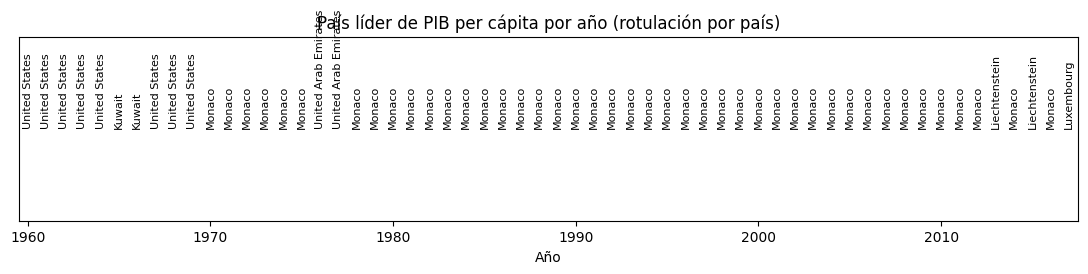

In [125]:
# Contar cuántas veces cada país ha sido líder anual
leader_counts = (
    leaders_by_year["Country"]
    .value_counts()
    .rename_axis("Country").reset_index(name="veces_lider")
)

print("Países que más veces han sido líderes anuales de PIB per cápita:")
display(leader_counts.head(10))

fig, ax = plt.subplots(figsize=(11, 2.8))

# Marcamos con puntos el país ganador por año (texto encima)
ax.plot(leaders_by_year["Year"], np.arange(len(leaders_by_year)), linestyle="None")  # marcador ficticio para eje
for _, row in leaders_by_year.iterrows():
    ax.text(row["Year"], 0, row["Country"], rotation=90, va="bottom", ha="center", fontsize=8)

ax.set_xlim(leaders_by_year["Year"].min()-0.5, leaders_by_year["Year"].max()+0.5)
ax.set_ylim(-1, 1)
ax.set_yticks([])
ax.set_title("País líder de PIB per cápita por año (rotulación por país)")
ax.set_xlabel("Año")
plt.tight_layout()
plt.show()


## Ejercicio 2.
For each of the following series, make a graph of the data. If transforming seems appropriate, do so and describe the effect.

* United States GDP from *global_economy*.
* Slaughter of Victorian “Bulls, bullocks and steers” in *aus_livestock*.
* Victorian Electricity Demand from *vic_elec*.
* Gas production from *aus_production*.

In [126]:
# Cargamos todos los datasets.
gdp = pd.read_csv("https://raw.githubusercontent.com/AnthonyFl22/series-de-tiempo/refs/heads/main/Tarea%201/global_economy.csv")
livestock = pd.read_csv("https://raw.githubusercontent.com/AnthonyFl22/series-de-tiempo/refs/heads/main/Tarea%201/aus_livestock.csv")
elec = pd.read_csv("https://raw.githubusercontent.com/AnthonyFl22/series-de-tiempo/refs/heads/main/Tarea%201/vic_elec.csv")
prod = pd.read_csv("https://raw.githubusercontent.com/AnthonyFl22/series-de-tiempo/refs/heads/main/Tarea%201/aus_production.csv")

In [127]:
gdp.head()

,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0


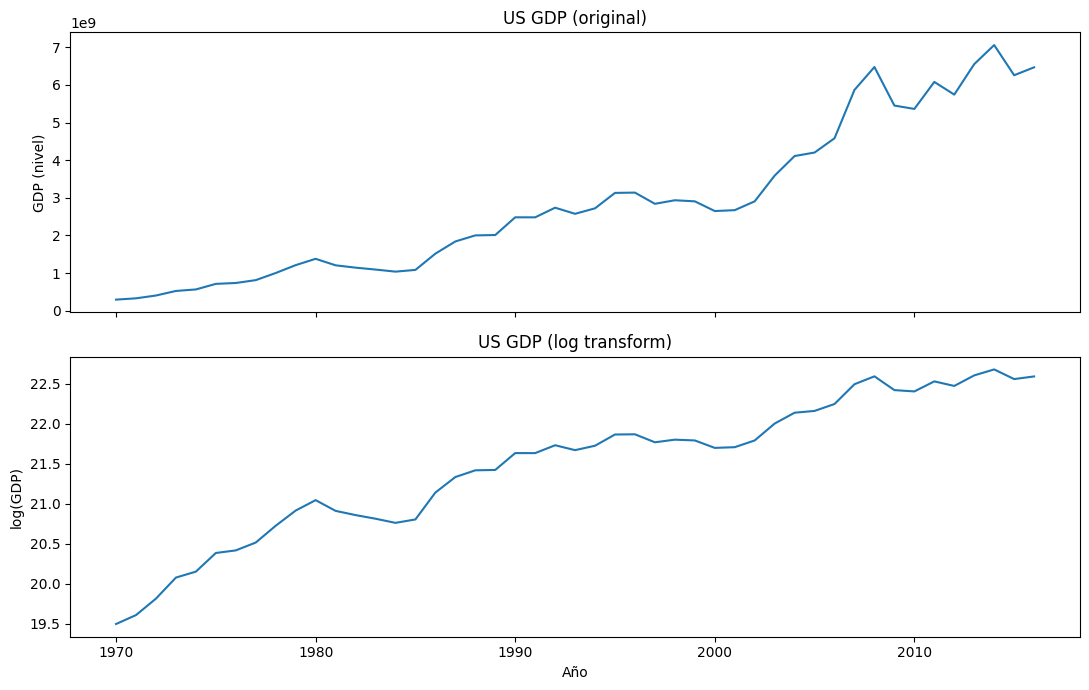

In [128]:
# Vamos a filtrar por país
us_gdp = gdp[gdp["unique_id"] == "Monaco"].copy()
us_gdp["Year"] = pd.to_numeric(us_gdp["ds"], errors="coerce")
us_gdp = us_gdp.dropna(subset=["Year", "GDP"]).sort_values("Year")

fig, axes = plt.subplots(2, 1, figsize=(11, 7), sharex=True)

# Original
axes[0].plot(us_gdp["Year"], us_gdp["GDP"])
axes[0].set_title("US GDP (original)")
axes[0].set_ylabel("GDP (nivel)")

# Log-transform (λ≈0 de Box-Cox)
axes[1].plot(us_gdp["Year"], np.log(us_gdp["GDP"]))
axes[1].set_title("US GDP (log transform)")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("log(GDP)")

plt.tight_layout()
plt.show()


In [129]:
livestock.head()

,unique_id,ds,y
0,"Australian Capital Territory_Bulls, bullocks a...",1976-07-01,2300.0
1,"Australian Capital Territory_Bulls, bullocks a...",1976-08-01,2100.0
2,"Australian Capital Territory_Bulls, bullocks a...",1976-09-01,2100.0
3,"Australian Capital Territory_Bulls, bullocks a...",1976-10-01,1900.0
4,"Australian Capital Territory_Bulls, bullocks a...",1976-11-01,2100.0


In [130]:
# Aquí haremos una transformación previa. Vamos a separar entre el estado y el animal.
livestock = livestock.copy()
livestock[["State", "Animal"]] = livestock["unique_id"].str.split("_", n=1, expand=True)
livestock["Month"] = pd.to_datetime(livestock["ds"], errors="coerce")

bulls_vic = livestock[
    (livestock["State"] == "Victoria") &
    (livestock["Animal"] == "Bulls, bullocks and steers")
].dropna(subset=["Month", "y"]).sort_values("Month")




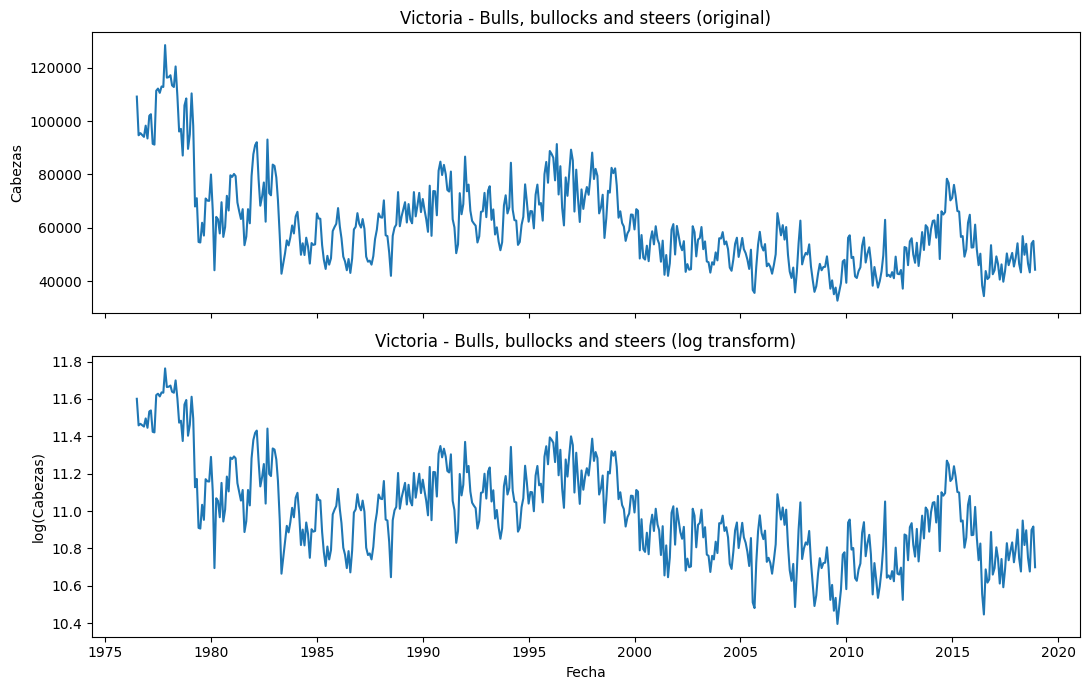

In [131]:
fig, axes = plt.subplots(2, 1, figsize=(11, 7), sharex=True)

# Original
axes[0].plot(bulls_vic["Month"], bulls_vic["y"])
axes[0].set_title("Victoria - Bulls, bullocks and steers (original)")
axes[0].set_ylabel("Cabezas")

# Log-transform (evitar log(0))
axes[1].plot(bulls_vic["Month"], np.log(bulls_vic["y"].clip(lower=1e-9)))
axes[1].set_title("Victoria - Bulls, bullocks and steers (log transform)")
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("log(Cabezas)")

plt.tight_layout()
plt.show()

In [132]:
elec.head()

,ds,unique_id,y,Holiday
0,2012-01-01 00:00:00,Demand,4382.825174,True
1,2012-01-01 00:30:00,Demand,4263.365526,True
2,2012-01-01 01:00:00,Demand,4048.966046,True
3,2012-01-01 01:30:00,Demand,3877.563330,True
4,2012-01-01 02:00:00,Demand,4036.229746,True


In [133]:
# Sabiendo que y es la demana y el timestamp o ds es cada 30 minutos, entonces
elec = elec.copy()
elec["ds"] = pd.to_datetime(elec["ds"], errors="coerce")
elec = elec.dropna(subset=["ds", "y"]).sort_values("ds")


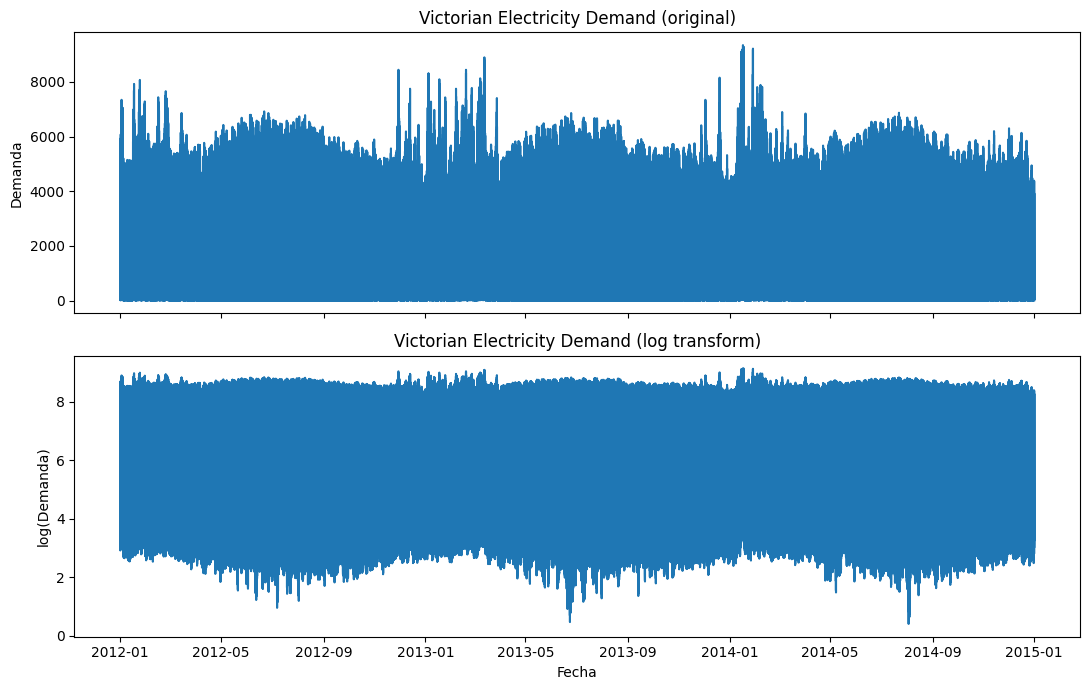

In [134]:
fig, axes = plt.subplots(2, 1, figsize=(11, 7), sharex=True)

# Original
axes[0].plot(elec["ds"], elec["y"])
axes[0].set_title("Victorian Electricity Demand (original)")
axes[0].set_ylabel("Demanda")

# Log-transform
axes[1].plot(elec["ds"], np.log(elec["y"].clip(lower=1e-9)))
axes[1].set_title("Victorian Electricity Demand (log transform)")
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("log(Demanda)")

plt.tight_layout()
plt.show()

In [135]:
prod.head()

,ds,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956-01-01,284,5225.0,189.0,465,3923,5
1,1956-04-01,213,5178.0,204.0,532,4436,6
2,1956-07-01,227,5297.0,208.0,561,4806,7
3,1956-10-01,308,5681.0,197.0,570,4418,6
4,1957-01-01,262,5577.0,187.0,529,4339,5


In [136]:
# Aquí tomamos en cuenta que ds es la fecha

gas = prod[["ds", "Gas"]].copy()
gas["Quarter"] = pd.to_datetime(gas["ds"], errors="coerce")
gas = gas.dropna(subset=["Quarter", "Gas"]).sort_values("Quarter")


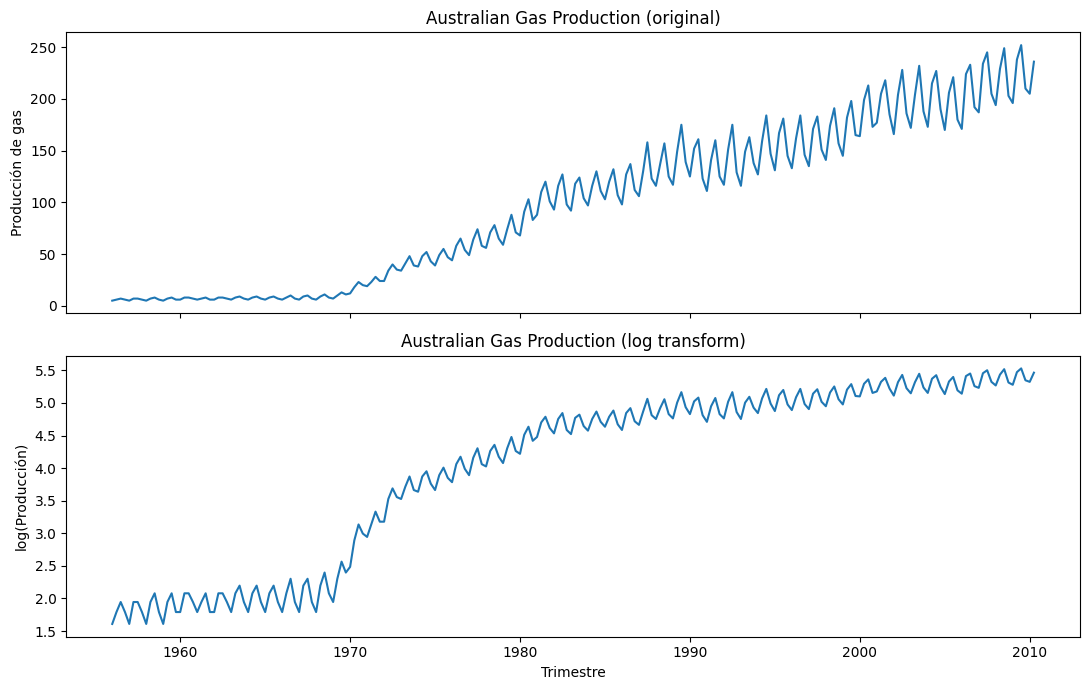

In [137]:
fig, axes = plt.subplots(2, 1, figsize=(11, 7), sharex=True)

# Original
axes[0].plot(gas["Quarter"], gas["Gas"])
axes[0].set_title("Australian Gas Production (original)")
axes[0].set_ylabel("Producción de gas")

# Log-transform
axes[1].plot(gas["Quarter"], np.log(gas["Gas"].clip(lower=1e-9)))
axes[1].set_title("Australian Gas Production (log transform)")
axes[1].set_xlabel("Trimestre")
axes[1].set_ylabel("log(Producción)")

plt.tight_layout()
plt.show()

Podemos notar algunas cosas al haber aplicado dichas transformaciones:
- Monaco GDP: el log estabiliza la varianza y permite interpretar cambios en términos relativos.
- Slaughter (Victoria, Bulls...): el log reduce picos y hace más uniforme la estacionalidad.
- Vic Electricity: el log suaviza picos de alta demanda manteniendo la estructura estacional
- Gas Production: el log hace más constante la amplitud de la estacionalidad a lo largo de los años.

## Ejercicio 3
Why is a Box-Cox transformation unhelpful for the canadian_gas data?



In [138]:
df = pd.read_csv("https://raw.githubusercontent.com/AnthonyFl22/series-de-tiempo/refs/heads/main/Tarea%201/canadian_gas.csv")
df.head()

,unique_id,ds,y
0,Canadian gas production,1960-01-01,1.4306
1,Canadian gas production,1960-02-01,1.3059
2,Canadian gas production,1960-03-01,1.4022
3,Canadian gas production,1960-04-01,1.1699
4,Canadian gas production,1960-05-01,1.1161


In [139]:
#Como ds es la fecha, vamos a asegurarnos de formatearla correctamente
df["ds"] = pd.to_datetime(df["ds"], errors="coerce")


In [140]:
# Eliminar cualquier fila con fecha inválida
n_bad = df["ds"].isna().sum()
if n_bad > 0:
    print(f"Se eliminaron {n_bad} filas con 'ds' inválido.")
    df = df.dropna(subset=["ds"])

In [141]:
#Aseguramos de tener ordenados los datos por la fecha
df = df.sort_values("ds").reset_index(drop=True)
print("Rango temporal:", df["ds"].min(), "→", df["ds"].max(), )


Rango temporal: 1960-01-01 00:00:00 → 2005-02-01 00:00:00


In [142]:
print("Columnas:", df.columns)

Columnas: Index(['unique_id', 'ds', 'y'], dtype='object')


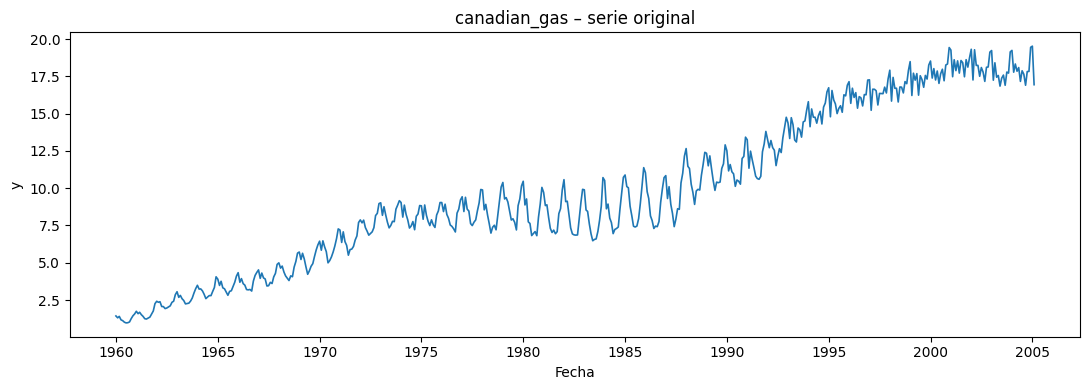

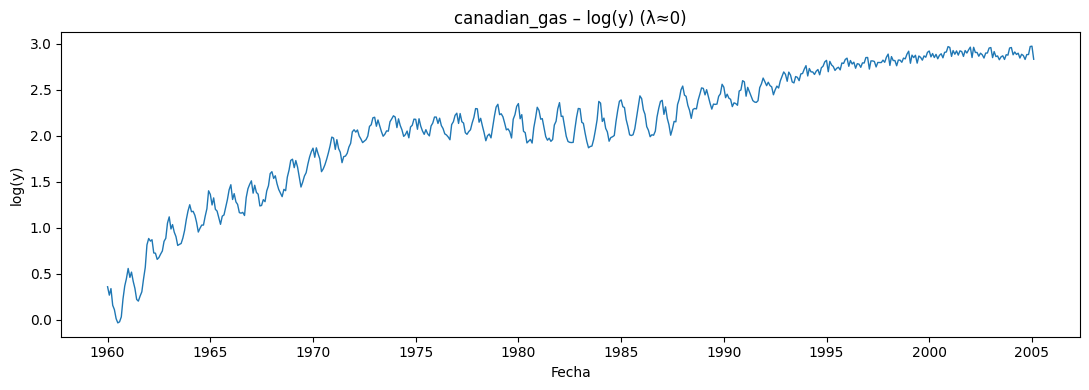

In [143]:
y = pd.to_numeric(df["y"], errors="coerce")

plt.figure(figsize=(11,4))
plt.plot(df["ds"], y, linewidth=1.2)
plt.title("canadian_gas – serie original")
plt.xlabel("Fecha"); plt.ylabel("y"); plt.tight_layout(); plt.show()

plt.figure(figsize=(11,4))
plt.plot(df["ds"], np.log(y), linewidth=1.0)
plt.title("canadian_gas – log(y) (λ≈0)")
plt.xlabel("Fecha"); plt.ylabel("log(y)"); plt.tight_layout(); plt.show()


   year      mean     min     max     amp  amp_over_mean
0  1960  1.222342  0.9660  1.5637  0.5977       0.488979
1  1961  1.551417  1.2238  2.2549  1.0311       0.664618
2  1962  2.244500  1.9263  2.8554  0.9291       0.413945
3  1963  2.640858  2.2407  3.2577  1.0170       0.385102
4  1964  3.109467  2.5920  4.0565  1.4645       0.470981
    year       mean      min      max     amp  amp_over_mean
41  2001  18.289100  17.4745  19.2651  1.7906       0.097905
42  2002  18.190442  17.1660  19.3208  2.1548       0.118458
43  2003  17.773567  16.8482  19.2350  2.3868       0.134289
44  2004  18.000325  16.9067  19.4526  2.5459       0.141436
45  2005  18.236250  16.9441  19.5284  2.5843       0.141712
Correlación mean vs amp/mean: -0.8270000072346033


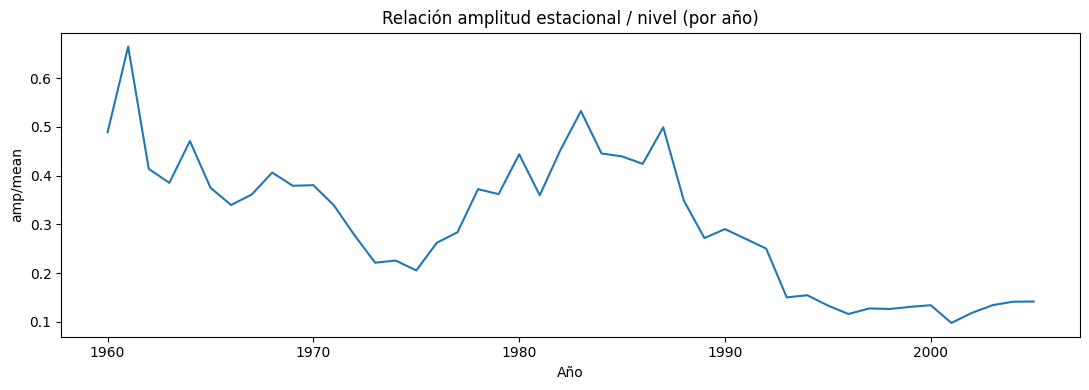

In [144]:
# Asegúrate de haber corrido la celda de “arreglo” antes
y = pd.to_numeric(df["y"], errors="coerce")

annual = (df.assign(year=df["ds"].dt.year)
            .groupby("year")["y"]
            .agg(mean="mean", min="min", max="max")
            .reset_index())

annual["amp"] = annual["max"] - annual["min"]
annual["amp_over_mean"] = annual["amp"] / annual["mean"]

print(annual.head(5))
print(annual.tail(5))
print("Correlación mean vs amp/mean:",
      annual[["mean","amp_over_mean"]].corr().iloc[0,1])

import matplotlib.pyplot as plt
plt.figure(figsize=(11,4))
plt.plot(annual["year"], annual["amp_over_mean"])
plt.title("Relación amplitud estacional / nivel (por año)")
plt.xlabel("Año"); plt.ylabel("amp/mean"); plt.tight_layout(); plt.show()


In [145]:
# Serie completa
y_all = pd.to_numeric(df["y"], errors="coerce").dropna()
lam_all = boxcox_normmax(y_all, method="mle")
print("λ (toda la serie):", round(lam_all, 3))

# Subperíodos
y1 = pd.to_numeric(df[df["ds"].dt.year <= 1975]["y"], errors="coerce").dropna()
y2 = pd.to_numeric(df[(df["ds"].dt.year > 1975) & (df["ds"].dt.year <= 1990)]["y"], errors="coerce").dropna()
y3 = pd.to_numeric(df[df["ds"].dt.year > 1990]["y"], errors="coerce").dropna()

lam_1 = boxcox_normmax(y1, method="mle")
lam_2 = boxcox_normmax(y2, method="mle")
lam_3 = boxcox_normmax(y3, method="mle")

print("λ (≤1975):", round(lam_1, 3))
print("λ (1976–1990):", round(lam_2, 3))
print("λ (>1990):", round(lam_3, 3))


λ (toda la serie): 0.619
λ (≤1975): 0.514
λ (1976–1990): -0.64
λ (>1990): 3.616


Contestando la pregunta tenemos que: Una Box-Cox transformation es inútil para canadian_gas porque la serie no presenta una varianza proporcional estable al nivel. La amplitud estacional relativa disminuye con los años y el “λ óptimo” **cambia radicalmente entre períodos**. En consecuencia, ningún valor fijo de λ logra estabilizar toda la serie: aplicar Box-Cox arreglaría un tramo pero distorsionaría otros.

## Ejercicio 4
What Box-Cox transformation would you select for your retail data (from Exercise 7 in Section 2.10)?

### Exercise 7 in 2.10:
The aus_arrivals data set comprises quarterly international arrivals to Australia from Japan, New Zealand, UK and the US.

Use plot_series() to visualize the data.
Use seaborn or matplotlib to create seasonal and subseries plots to compare the differences between the arrivals from these four countries and identify any unusual observations.

In [146]:
arrivals = pd.read_csv("https://raw.githubusercontent.com/AnthonyFl22/series-de-tiempo/refs/heads/main/Tarea%201/aus_arrivals.csv")
arrivals.head()

,Quarter,Origin,Arrivals
0,1981-01-01,Japan,14763
1,1981-04-01,Japan,9321
2,1981-07-01,Japan,10166
3,1981-10-01,Japan,19509
4,1982-01-01,Japan,17117


In [147]:
# Adecuamos la data acorde al tipo de datos que necesitamos
arrivals["Quarter"] = pd.to_datetime(arrivals["Quarter"], errors="coerce")
arrivals = arrivals.dropna(subset=["Quarter", "Arrivals", "Origin"]).sort_values(["Origin","Quarter"])
arrivals["Year"] = arrivals["Quarter"].dt.year

In [148]:
print(arrivals.dtypes)
arrivals.head()

Quarter     datetime64[ns]
Origin              object
Arrivals             int64
Year                 int32
dtype: object


,Quarter,Origin,Arrivals,Year
0,1981-01-01,Japan,14763,1981
1,1981-04-01,Japan,9321,1981
2,1981-07-01,Japan,10166,1981
3,1981-10-01,Japan,19509,1981
4,1982-01-01,Japan,17117,1982


In [149]:
def suggest_from_lambda(lmbda, tol=0.2):
    # Si |λ| es pequeño, el log (λ≈0) es una muy buena aproximación
    return "usar log (λ≈0)" if abs(lmbda) <= tol else f"usar λ={lmbda:.3f}"

lambda_rows = []
for origin, g in arrivals.groupby("Origin"):
    y = pd.to_numeric(g["Arrivals"], errors="coerce").dropna()
    # y>0 para Box-Cox; en este dataset se cumple
    lam = boxcox_normmax(y, method="mle")
    lambda_rows.append({"Origin": origin, "lambda_mle": lam, "sugerencia": suggest_from_lambda(lam)})

lambda_df = pd.DataFrame(lambda_rows).sort_values("Origin").reset_index(drop=True)
print("Lambdas por país (MLE):")
display(lambda_df)

Lambdas por país (MLE):


,Origin,lambda_mle,sugerencia
0,Japan,0.942597,usar λ=0.943
1,NZ,0.444446,usar λ=0.444
2,UK,0.198585,usar log (λ≈0)
3,US,1.192218,usar λ=1.192


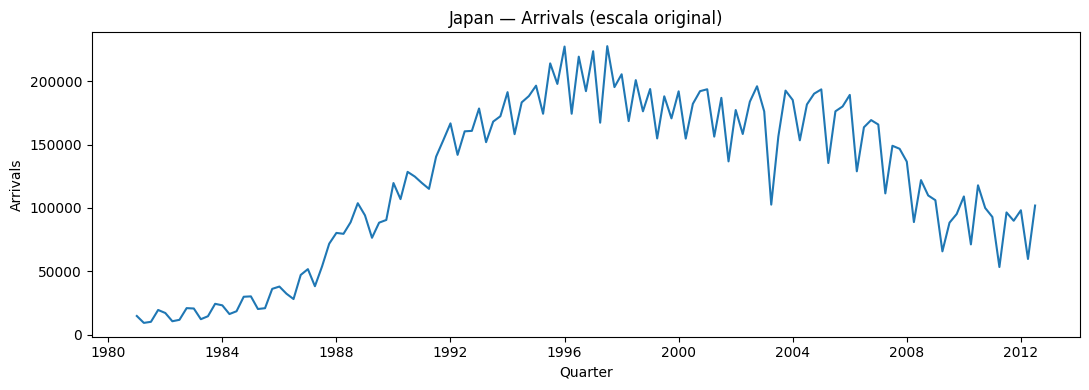

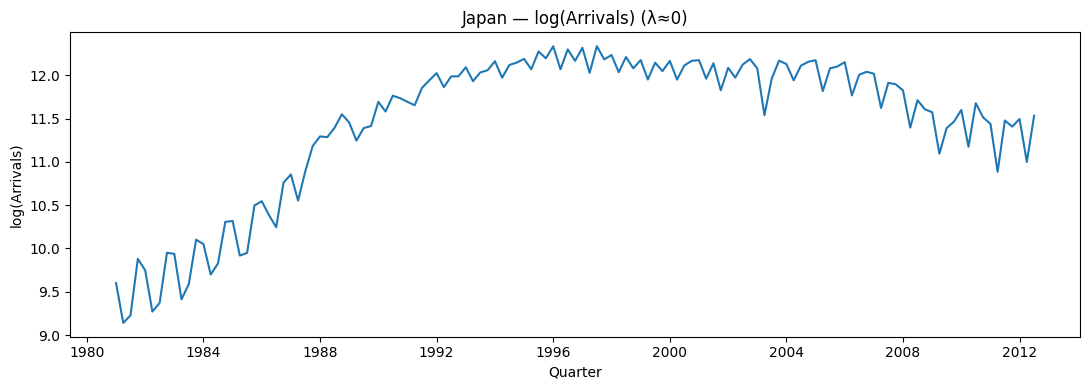

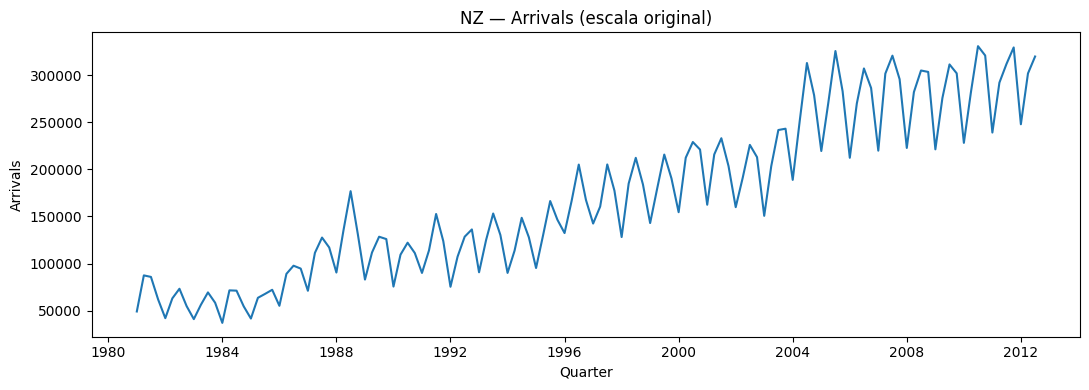

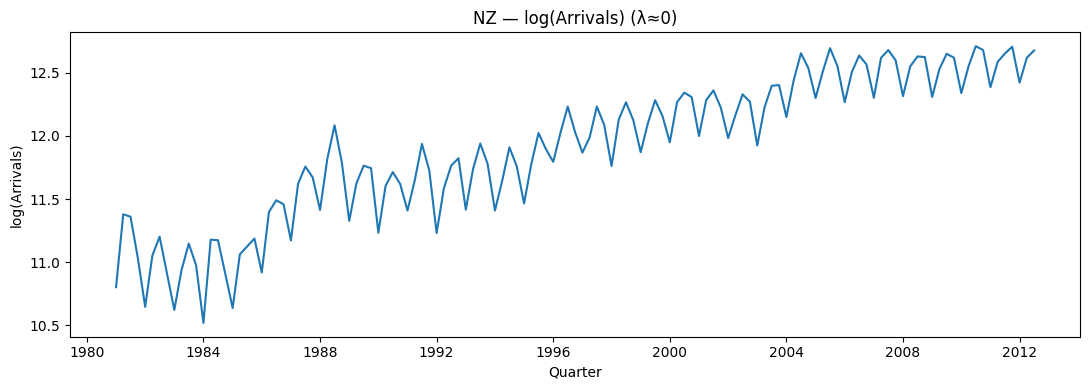

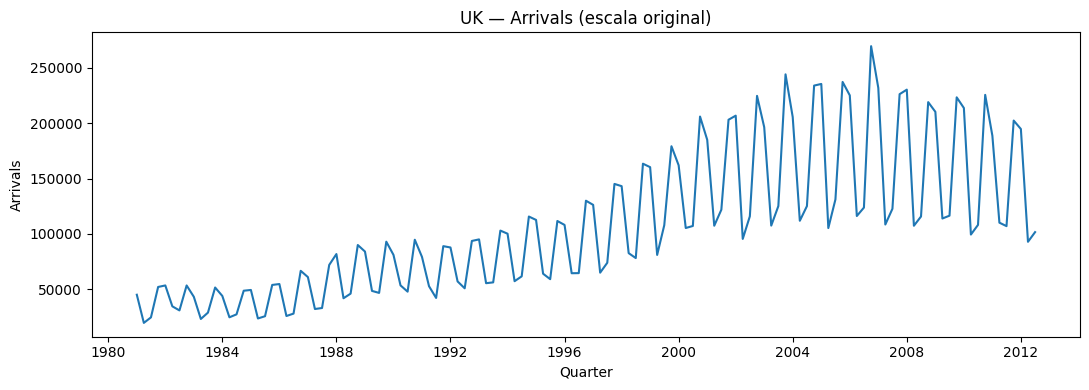

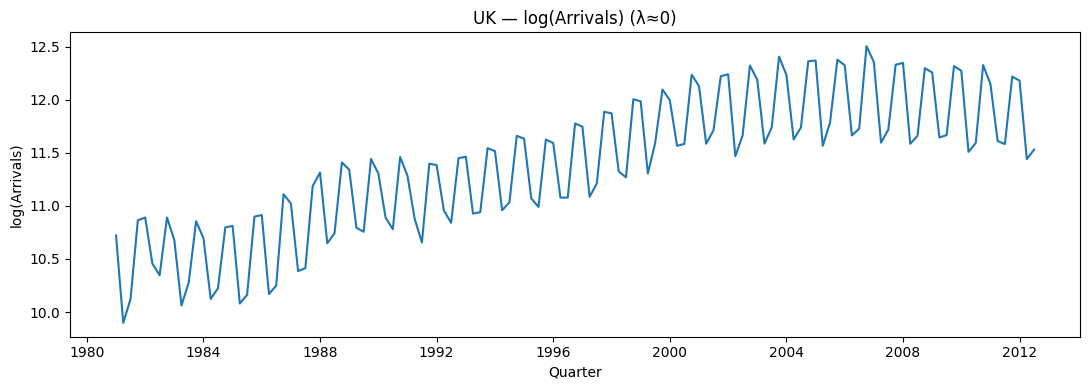

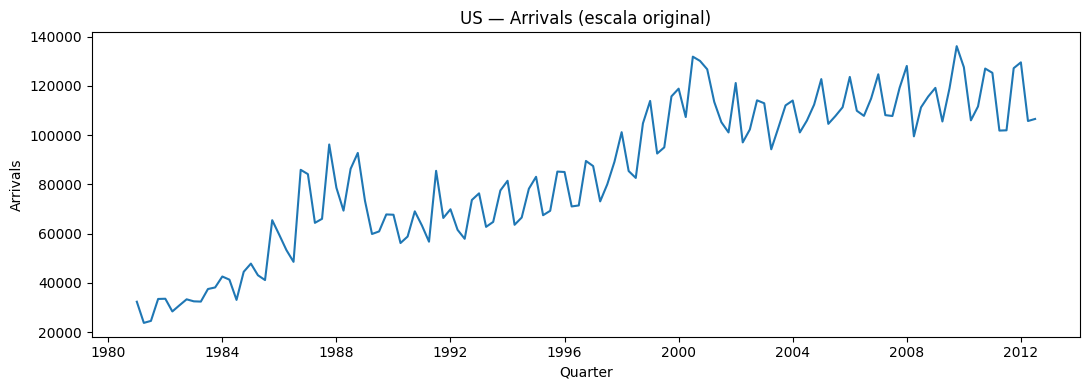

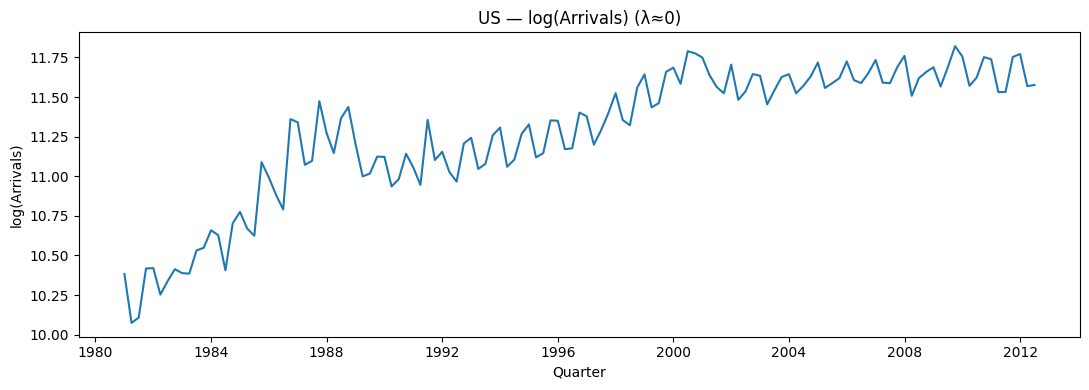

In [150]:
for origin, g in arrivals.groupby("Origin"):
    g = g.sort_values("Quarter").copy()
    g["logA"] = np.log(g["Arrivals"])

    plt.figure(figsize=(11,4))
    plt.plot(g["Quarter"], g["Arrivals"], linewidth=1.5)
    plt.title(f"{origin} — Arrivals (escala original)")
    plt.xlabel("Quarter"); plt.ylabel("Arrivals")
    plt.tight_layout(); plt.show()

    plt.figure(figsize=(11,4))
    plt.plot(g["Quarter"], g["logA"], linewidth=1.5)
    plt.title(f"{origin} — log(Arrivals) (λ≈0)")
    plt.xlabel("Quarter"); plt.ylabel("log(Arrivals)")
    plt.tight_layout(); plt.show()


In [151]:
# Si todos los λ están cerca de 0, recomendamos log para el análisis conjunto
tol = 0.2
all_near_zero = (lambda_df["lambda_mle"].abs() <= tol).all()
if all_near_zero:
    print("Conclusión: Para las cuatro series (Japan, New Zealand, UK, US), "
          "λ está cerca de 0 → aplicar transformación logarítmica (Box–Cox con λ≈0).")
else:
    print("Conclusión: Algunos λ se apartan de 0. Usa log si |λ|≤0.2; "
          "en caso contrario aplica Box–Cox con el λ específico por país.\n")
    display(lambda_df)


Conclusión: Algunos λ se apartan de 0. Usa log si |λ|≤0.2; en caso contrario aplica Box–Cox con el λ específico por país.



,Origin,lambda_mle,sugerencia
0,Japan,0.942597,usar λ=0.943
1,NZ,0.444446,usar λ=0.444
2,UK,0.198585,usar log (λ≈0)
3,US,1.192218,usar λ=1.192
